In [115]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

In [86]:
class LinearRegression_local:

    def __init__(self):
        self.coeff_ = None
        self.intercept_ = None
        self.m = 0
        self.b = 0
        self.learning_rate = 0.1
        self.epoch = 300

    def fit(self,x_train,y_train):
        x_train = np.insert(x_train,0,1,axis=1)
        beta = np.linalg.inv(np.dot(x_train.T,x_train)).dot(x_train.T,y_train)
        self.coeff_ = beta[1:]
        self.intercept_ = beta[0]

    def predict(self,x_test):
        return self.coeff_*x_test + self.intercept_


In [83]:
x = 10*np.random.rand(150,1) - 5
y = 0.5 * x**2 + x + 3 + np.random.randn(150,1)

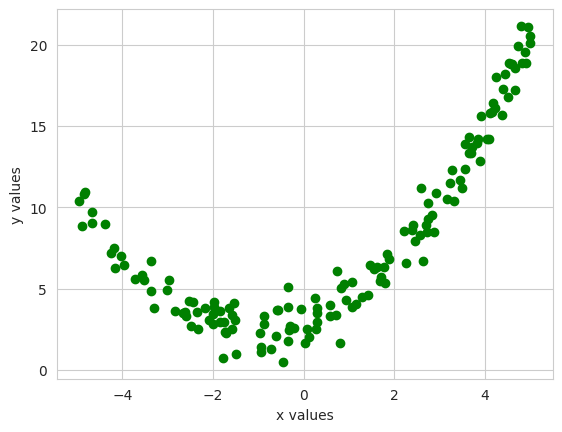

In [84]:
plt.xlabel('x values')
plt.ylabel('y values')
plt.scatter(x,y,color='green')
plt.show()

In [85]:
polynomial_instance = PolynomialFeatures(degree=2,include_bias=False)
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)
x_poly_transformed_train = polynomial_instance.fit_transform(x_train)
x_poly_transformed_test = polynomial_instance.fit_transform(x_test)

In [87]:
ll = LinearRegression()
ll.fit(x_poly_transformed_train,y_train)
y_pred = ll.predict(x_poly_transformed_test)

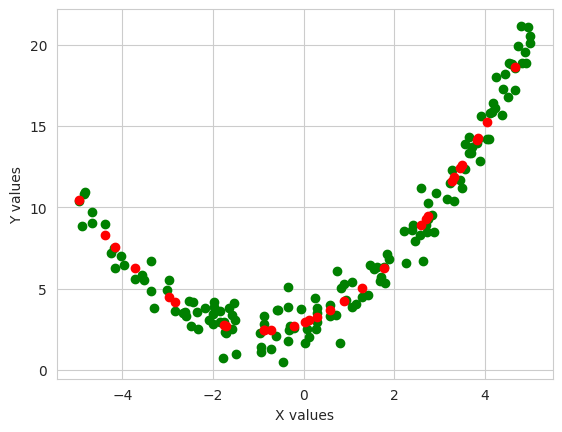

In [88]:
plt.scatter(x,y,color='green')
plt.scatter(x_test,y_pred,color='red')
plt.xlabel('X values')
plt.ylabel('Y values')
plt.show()

In [117]:
print(r2_score(y_test,y_pred))

0.9634052680529903
